<a href="https://colab.research.google.com/github/dorsaalh/Spikey_Neurons_Simulation/blob/main/CN_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install brian2

     |████████████████████████████████| 1.2MB 13.1MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp37-cp37m-linux_x86_64.whl size=1257118 sha256=4dac4ff337b8e780927a91fa8ee2246bf47dac881e2874df1342d4239fa81e83
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2


In [ ]:
pip install brian2tools

     |████████████████████████████████| 71kB 5.5MB/s 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from brian2 import *
from random import random 
from brian2tools import brian_plot , plot_raster
from brian2.units import *

In [ ]:
tau = 250
V_th = -50
V_r = -70
R = 0.7
V_init = -70
p_exc = 0.1
p_inh = 0.05
w_e = 0.0004
w_i = -8
N_exc = 800
N_inh = 200

In [ ]:
start_scope()
G = NeuronGroup(N_exc + N_inh , '''dv/dt = ( ((V_r - v)+(R*I))/tau ) /(ms) : 1
                                  I : 1''',
                threshold = 'v > V_th',
                reset='v = V_r'
                )

G.v = V_init
G.I = '(rand()*200)'
         

exc_neurons = G[:N_exc]
inh_neurons = G[N_exc:]
 

exc_synapse = Synapses(exc_neurons , G , 'w:1' , on_pre = 'v_post += w')  
inh_synapse = Synapses(inh_neurons , G , 'w:1' , on_pre = 'v_post += w')


exc_synapse.connect(p = p_exc)
exc_synapse.w = w_e
inh_synapse.connect(p = p_inh)
inh_synapse.w = w_i

 
spike_mon_exc = SpikeMonitor(exc_neurons)
spike_mon_inh = SpikeMonitor(inh_neurons)
spike_mon_G = SpikeMonitor(G)

state_mon_exc_V = StateMonitor(exc_neurons , 'v' , record=True)
state_mon_inh_V = StateMonitor(inh_neurons , 'v' , record=True)
state_mon_G_V = StateMonitor(exc_neurons , 'v' , record=True)
state_mon_G_I = StateMonitor(G , 'I' , record=True)

run(100*ms, report='text')

INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.07s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 100. ms
100. ms (100%) simulated in < 1s


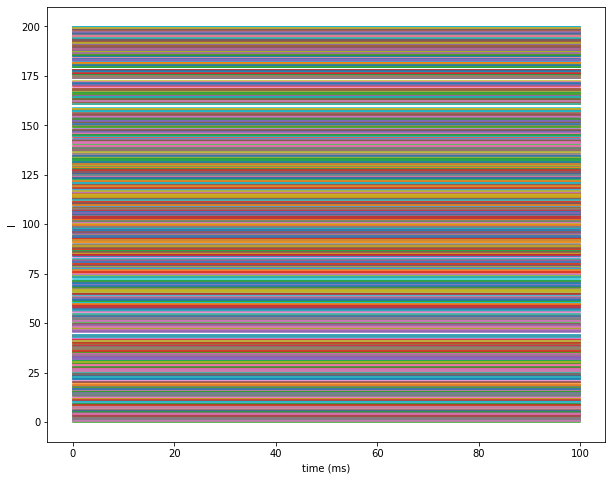

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(state_mon_G_I)

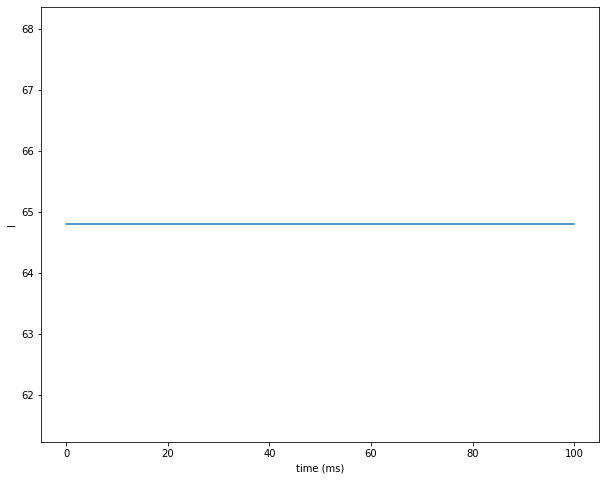

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(state_mon_G_I[7])

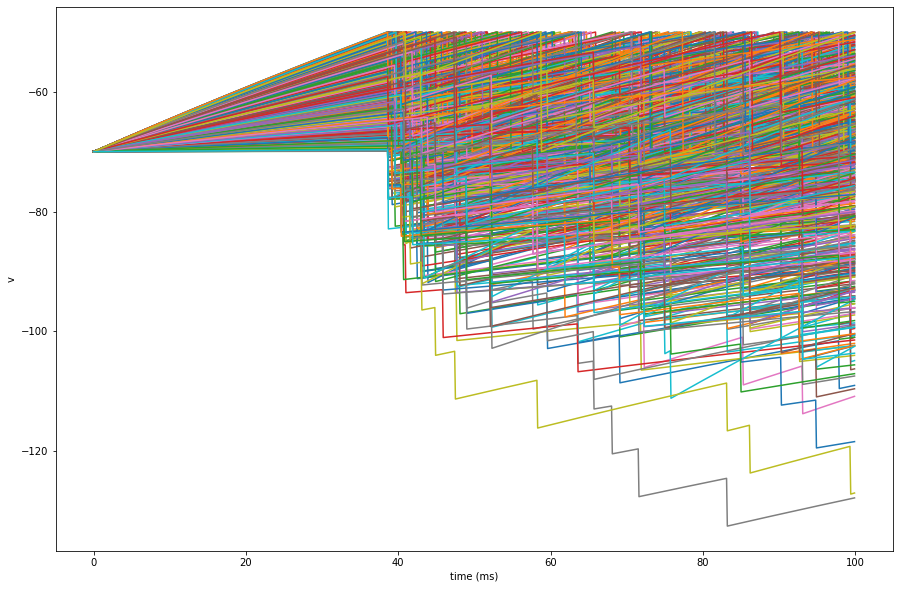

In [ ]:
plt.figure(figsize=(15,10))
brian_plot(state_mon_G_V)

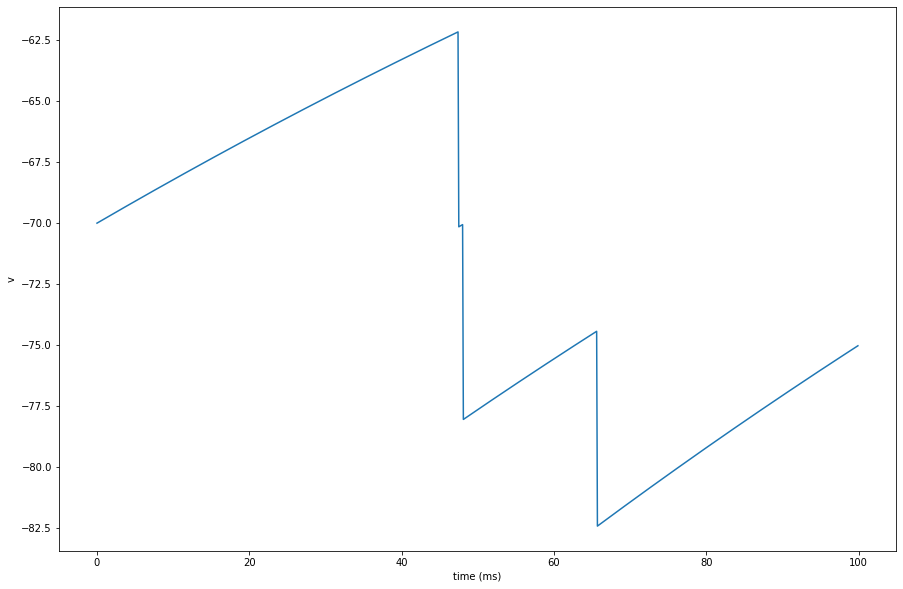

In [ ]:
plt.figure(figsize=(15,10))
brian_plot(state_mon_G_V[7])

In [ ]:
print(f"G spikes = {spike_mon_G.num_spikes} ")
print(f"exc spike = {spike_mon_exc.num_spikes} ")
print(f"inh spike = {spike_mon_inh.num_spikes} ")

G spikes = 306 
exc spike = 253 
inh spike = 53 


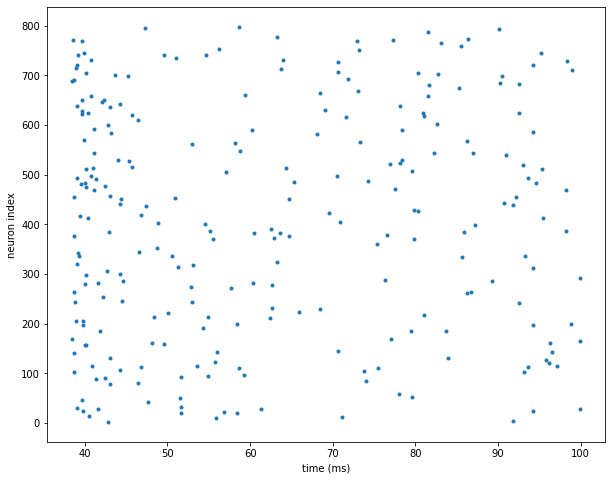

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_exc)

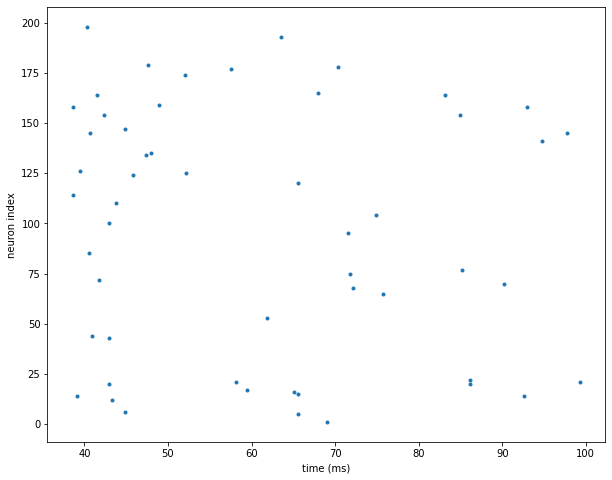

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_inh)

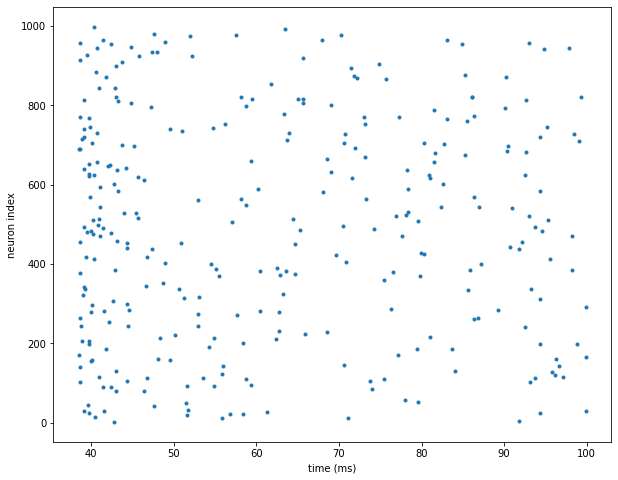

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_G)